[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


(60000, 28, 28)


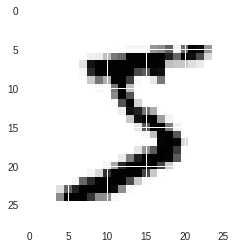

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          16010     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 21,466
Trainable params: 21,466
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.1652 - acc: 0.9513
Epoch 2/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0563 - acc: 0.9834
Epoch 3/10
12032/60000 [=====>........................] - ETA: 12s - loss: 0.0391 - acc: 0.9879

60000/60000 [==============================] - 15s 257us/step - loss: 0.0401 - acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0312 - acc: 0.9900
Epoch 5/10
20672/60000 [=========>....................] - ETA: 10s - loss: 0.0235 - acc: 0.9922

60000/60000 [==============================] - 15s 258us/step - loss: 0.0263 - acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0213 - acc: 0.9932
Epoch 7/10
22624/60000 [==========>...................] - ETA: 9s - loss: 0.0138 - acc: 0.9960

60000/60000 [==============================] - 15s 257us/step - loss: 0.0168 - acc: 0.9947
Epoch 8/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0153 - acc: 0.9949
Epoch 9/10
23104/60000 [==========>...................] - ETA: 9s - loss: 0.0112 - acc: 0.9963

60000/60000 [==============================] - 15s 257us/step - loss: 0.0133 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0106 - acc: 0.9963


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.033892516421844994, 0.9903]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[1.26642915e-17 1.66908814e-19 1.18593553e-08 1.81171037e-10
  1.24997547e-18 7.48634030e-16 3.66158556e-32 1.00000000e+00
  6.77589893e-15 9.02500435e-11]
 [1.55359094e-11 5.68639927e-11 1.00000000e+00 3.34943649e-18
  2.07958440e-19 2.95393661e-20 4.50808918e-10 1.19645743e-19
  2.51634813e-13 5.71718387e-16]
 [2.03099117e-11 9.99379516e-01 5.04228012e-07 8.07068995e-11
  3.22925116e-05 1.47541845e-08 1.45121901e-10 6.83015344e-07
  5.86917449e-04 1.65397953e-08]
 [1.00000000e+00 2.47281043e-19 1.38930761e-12 1.36655967e-14
  1.30390282e-11 6.76816603e-10 3.53389069e-08 4.37859113e-14
  4.04149110e-12 9.96608485e-09]
 [1.76863992e-12 3.60893507e-15 3.14553207e-14 6.24505999e-15
  9.99999881e-01 6.73399875e-15 5.00126792e-15 4.89960957e-14
  2.74668484e-08 3.74581859e-08]
 [9.42809025e-12 9.99841332e-01 1.67844121e-08 2.94500698e-13
  2.29829075e-05 4.13209640e-11 1.36911218e-12 5.70891025e-05
  7.84245640e-05 1.67371709e-07]
 [9.14948882e-25 6.97346301e-15 1.25742913e-14 1.86575641e

In [18]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7fd8fc35dc18>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7fd8fe3c3a90>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7fd8fc35dc88>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7fd8fe37f1d0>, 'flatten_1': <keras.layers.core.Flatten object at 0x7fd95d005c88>, 'activation_1': <keras.layers.core.Activation object at 0x7fd8fc3155f8>}


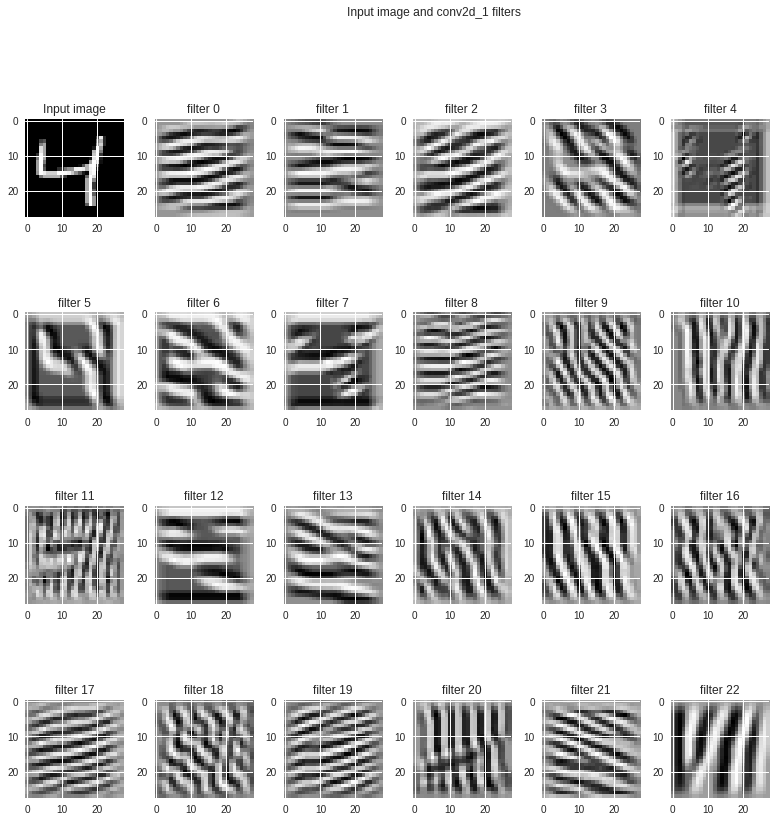

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()